In [26]:
# halflife machine learning project
# Michael Song, songmichael11@gmail.com



# For data formatting
import numpy as np
import pandas as pd
import random


# For plotting
import matplotlib
import matplotlib.pyplot as plt
# SMILES processing
from rdkit.Chem import AllChem
# For models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

pd.options.display.max_seq_items = 100

#cutoff numbers for scoring half-lives
LOW_CUTOFF = 7
HIGH_CUTOFF = 10

ImportError: dlopen(/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/_imaging.cpython-311-darwin.so, 0x0002): tried: '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/PIL/_imaging.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have (x86_64), need (arm64e)))

In [4]:
# read text file into pandas dataframe
filename = 'thalf_original.txt'  

data = pd.read_csv(filename, sep="\t|\s+", names = ["molecule", "half-life", "smiles"]) 

print(data)

                   molecule half-life  \
0               Bivalirudin     0.417   
1                Leuprolide         3   
2                 Goserelin       4-5   
3              Desmopressin       2.8   
4                Cetrorelix      62.8   
...                     ...       ...   
1644  Melphalan_flufenamide       1.1   
1645          Fosdenopterin   1.2-1.7   
1646  Serdexmethylphenidate      11.7   
1647           Nirmatrelvir      6.05   
1648            Belumosudil        19   

                                                 smiles  
0     CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...  
1     CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...  
2     CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...  
3     NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...  
4     CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...  
...                                                 ...  
1644  CCOC(=O)[C@H](CC1=CC=C(F)C=C1)NC(=O)[C@@H](N)C...  
1645  [H][C@@]12COP(O)(=O)O[C@]1([H])C(O)(O

/var/folders/hh/fvxmgxxd3x5fqqm0w3fmy1d80000gn/T/ipykernel_20355/1837655046.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(filename, sep="\t|\s+", names = ["molecule", "half-life", "smiles"])


In [5]:
# read thalfLog.txt file into pandas dataframe
filename = 'thalfLog.txt'  

data = pd.read_csv(filename, sep="\t|\s+", names = ["half-life"]) 
print(data.columns)
# print(data.head(5))


data.reset_index(inplace = True)
# print(data.head(5))


data = data.rename(columns = {'level_0':'smiles'})
data["half-life"] = data["half-life"].combine_first(data["level_1"])

data.drop(['level_1'], axis=1, inplace=True)
print(data.head(10))



Index(['half-life'], dtype='object')
                                              smiles  half-life
0  CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...       4.14
1  CC[C@@H]1NC(=O)[C@H]([C@H](O)[C@H](C)C\C=C\C)N...       2.94
2  C[C@H](CNC(=O)CC[C@]1(C)[C@@H](CC(N)=O)[C@H]2N...       4.97
3  C[C@H](CCCC(C)(C)O)[C@@]1([H])CC[C@@]2([H])\C(...       1.87
4                        NCC(CC(O)=O)C1=CC=C(Cl)C=C1       1.70
5               C[C@@](CC1=CC(O)=C(O)C=C1)(NN)C(O)=O      -0.11
6  CC1=C(C)C2=C(CCC(C)(COC3=CC=C(CC4SC(=O)NC4=O)C...       3.22
7  [N+]1=2[Co-3]345([N+]6=C7[C@H]([C@@](CC(=O)N)(...       4.97
8                   COC1=CC(C(O)CNC(=O)CN)=C(OC)C=C1       1.25
9  COC1=C(OC)C(CS(=O)C2=NC3=C(N2)C=C(OC(F)F)C=C3)...       0.00


/var/folders/hh/fvxmgxxd3x5fqqm0w3fmy1d80000gn/T/ipykernel_20355/3649083528.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(filename, sep="\t|\s+", names = ["half-life"])


In [6]:
# read thalf.atp text file into pandas dataframe
filename = 'thalf.atp'  

data = pd.read_csv(filename, header = 0) 

data["fingerprint"] = data.loc[:, "A":"placeholder"].values.tolist()

print(data["fingerprint"].head(5))

0    [0.0, 2.0, 17.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2    [1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4    [0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: fingerprint, dtype: object


In [7]:
# code by Markus Dablander
# OPIG

# define function that transforms SMILES strings into ECFPs
def ECFP_from_smiles(smiles,
                     R = 2,
                     L = 2**10,
                     use_features = False,
                     use_chirality = False):
    """
    Inputs:
    
    - smiles ... SMILES string of input compound
    - R ... maximum radius of circular substructures
    - L ... fingerprint-length
    - use_features ... if false then use standard DAYLIGHT atom features, if true then use pharmacophoric atom features
    - use_chirality ... if true then append tetrahedral chirality flags to atom features
    
    Outputs:
    - np.array(feature_list) ... ECFP with length L and maximum radius R
    """
    
    molecule = AllChem.MolFromSmiles(smiles)
    feature_list = AllChem.GetMorganFingerprintAsBitVect(molecule,
                                                                       radius = R,
                                                                       nBits = L,
                                                                       useFeatures = use_features,
                                                                       useChirality = use_chirality)
    return np.array(feature_list)

In [8]:
# finds invalid smiles in the dataset and drops them

invalid_mask = data['smiles'].apply(lambda x: AllChem.MolFromSmiles(x) is None)

# print(data.loc[invalid_mask, "molecule"])
data.drop(data.loc[invalid_mask].index, inplace=True)

# 281       Cisplatin
# 286     Oxaliplatin
# 348      Ivermectin
# 617     Carboplatin
# 1412     Temoporfin

  

KeyError: 'smiles'

In [9]:
#create ecfp column for dataframe

data["fingerprint"] = data["smiles"].apply(ECFP_from_smiles)

KeyError: 'smiles'

In [10]:
# calculates and returns average of a 
# range of two numbers with a hyphen, given a string
def half_life_average(half_life):
    print(half_life[955:960])
    nums = half_life.str.split('-')
    nums = nums.apply(lambda x: (float(x[0]) + float(x[1])) / 2)
    return nums / 2

In [11]:
#converts half life ranges into averages
# use a mask to identify rows that contain a hyphen
mask = data["half-life"].str.contains("-").fillna(False)

#apply average function to the rows identified by the mask
data.loc[mask, ["half-life"]] = data.loc[mask, ["half-life"]].apply(half_life_average)

# convert raw data into training/testing data
data.copy()

# convert half-life column to floats
data["half-life"] = pd.to_numeric(data["half-life"], downcast = "float")


AttributeError: Can only use .str accessor with string values!

In [12]:
# convert original data to features and target, and split data

#convert data into features matrix and target vector
X_data = np.stack(data["fingerprint"], axis = 0, dtype = float)
print(X_data.shape)
Y_data = data["half-life"]

#split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state= 400)

# reshape series into features matrix
# X_train = X_train.values[:, np.newaxis]
# X_test = X_test.values[:, np.newaxis]


(1647, 270)


NameError: name 'train_test_split' is not defined

In [19]:
#generate and train linear regression model on the data

# Create linear regression model
model = LinearRegression(fit_intercept=True)
model.fit(X_train, Y_train)

# Predict
Y_pred = model.predict(X_test)

# display R2 and RMSE
print("R2: ", metrics.r2_score(Y_test, Y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

R2:  -2.8845044085019
RMSE:  3.3709832707966383


In [256]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(200)
forest_model.fit(X_train, Y_train)

# Predict
Y_forest_pred = model.predict(X_test)

# display R2 and RMSE
print("R2: ", metrics.r2_score(Y_test, Y_forest_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test, Y_forest_pred)))

# xfit = np.linspace(0, 10, 1000)
# yfit = forest.predict(xfit[:, None])
# ytrue = model(xfit, sigma=0)
# plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
# plt.plot(xfit, yfit, '-r')
# plt.plot(xfit, ytrue, '-k', alpha=0.5)

KeyboardInterrupt: 

In [6]:
# SGDRegressor
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_model.fit(X_train, Y_train)

sgd_pred = sgd_model.predict(X_test)

# display R2 and RMSE
print("R2: ", metrics.r2_score(Y_test, sgd_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test, sgd_pred)))

R2:  -1.9995725576373014e+29
RMSE:  770580426766089.9


In [32]:
# SVR

from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, Y_train)

svr_pred = svr_model.predict(X_test)

# display R2 and RMSE
print("R2: ", metrics.r2_score(Y_test, svr_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test, svr_pred)))

R2:  0.2783909276112779
RMSE:  1.3920250385948476


In [33]:
# XGBoost

import xgboost as xgb

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, Y_train)

xgb_pred = xgb_model.predict(X_test)

# display R2 and RMSE
print("R2: ", metrics.r2_score(Y_test, svr_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test, svr_pred)))




R2:  0.2783909276112779
RMSE:  1.3920250385948476


In [1]:
import lightgbm as lgb

OSError: dlopen(/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/lightgbm/lib/lib_lightgbm.so, 0x0006): Library not loaded: '/usr/local/opt/libomp/lib/libomp.dylib'
  Referenced from: '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/lightgbm/lib/lib_lightgbm.so'
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

Text(0, 0.5, 'cumulative explained variance')

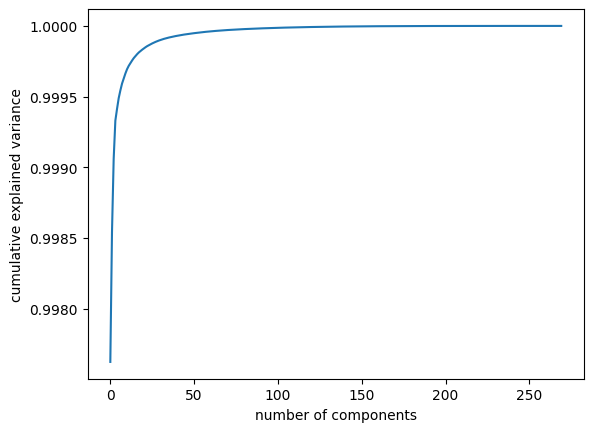

In [234]:
# Plots number of components needed to preserve variance in the data, from 1024 features down
# PCA 
from sklearn.decomposition import PCA


pca = PCA().fit(X_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

(1647, 270)
(1647, 2)


/var/folders/hh/fvxmgxxd3x5fqqm0w3fmy1d80000gn/T/ipykernel_9593/793687492.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral'))


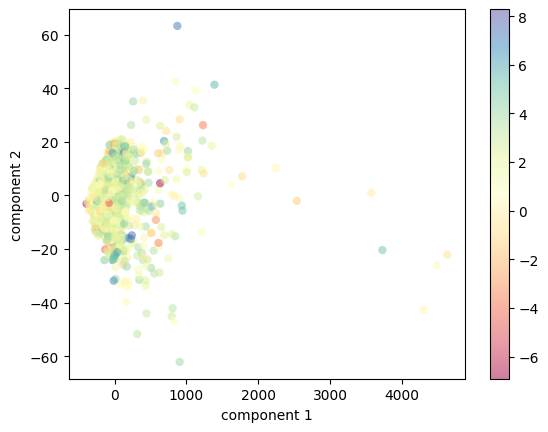

In [235]:
pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(X_data)
print(X_data.shape)
print(projected.shape)
plt.scatter(projected[:, 0], projected[:, 1],
c=Y_data, edgecolor='none', alpha=0.5,
cmap=plt.cm.get_cmap('Spectral'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

(array([ 96.,  84., 103.,  91.,  73.,  84.,  61.,  57.,  59.,  20.,  47.,
         33.,  38.,  26.,  18.,  37.,  15.,  22.,  23.,  12.,  36.,  16.,
         15.,  12.,   1.,  20.,   9.,  20.,   7.,   8.,  23.,  12.,   5.,
         11.,   5.,  13.,   6.,  18.,   1.,   1.,   6.,   1.,   9.,  11.,
          3.,  21.,   4.,   7.,   1.,   0.,  28.,   3.,   6.,   2.,   2.,
         11.,   3.,   4.,   1.,   2.,  22.,   1.,   6.,   0.,   0.,   7.,
          1.,   4.,   1.,   0.,   7.,   1.,   3.,   1.,   1.,  15.,   1.,
          1.,   2.,   0.,   6.,   4.,   3.,   2.,   0.,   2.,   0.,   5.,
          0.,   0.,   9.,   0.,   1.,   0.,   0.,   1.,   0.,   2.,   0.,
          8.]),
 array([ 0.        ,  0.40000001,  0.80000001,  1.20000005,  1.60000002,
         2.        ,  2.4000001 ,  2.79999995,  3.20000005,  3.5999999 ,
         4.        ,  4.4000001 ,  4.80000019,  5.19999981,  5.5999999 ,
         6.        ,  6.4000001 ,  6.80000019,  7.19999981,  7.5999999 ,
         8.        ,  8.39

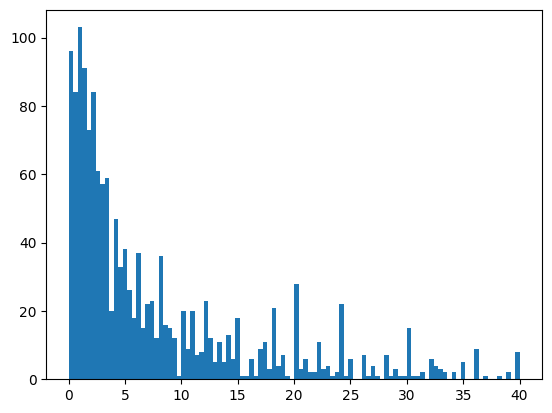

In [359]:
# drop outliers from the halflife data, based on a cutoff value

outlier_cutoff = 40

#drop all values above the outlier cutoff
data.drop(data.loc[data["half-life"] > outlier_cutoff].index, inplace=True)

# plot all halflives on a histogram
plt.hist(data["half-life"], bins=100, range=(0, outlier_cutoff))